In [17]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Setting global plot options

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [11]:
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
cols_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace_zero:
    df[col] = df[col].replace(0, np.nan)

df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
for col in cols_to_replace_zero:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
def get_bmi_category(bmi):
    """Categorizes BMI values into standard groups."""
    if pd.isna(bmi):
        return 'Unknown'
    elif bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

In [20]:
df['BMI_Category'] = df['BMI'].apply(get_bmi_category)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal Weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese


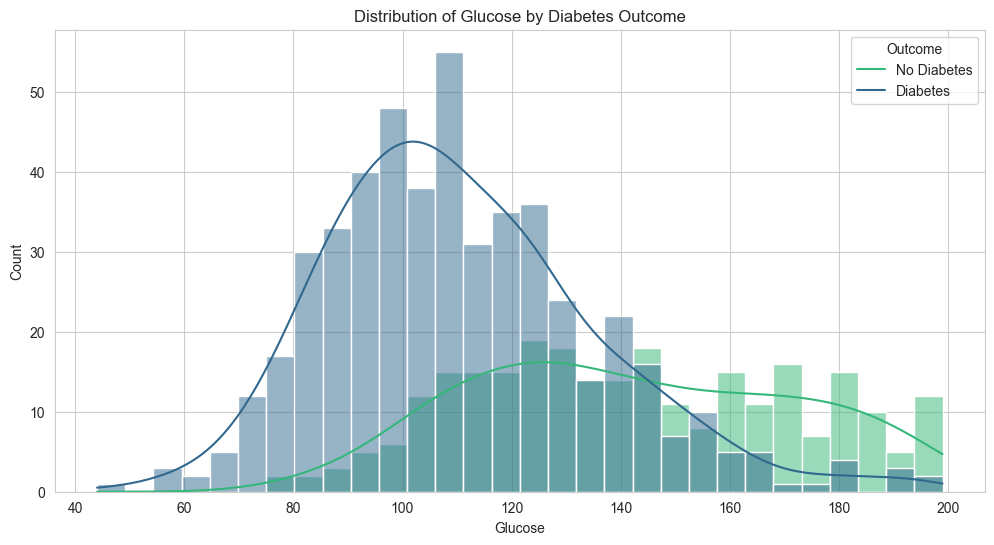

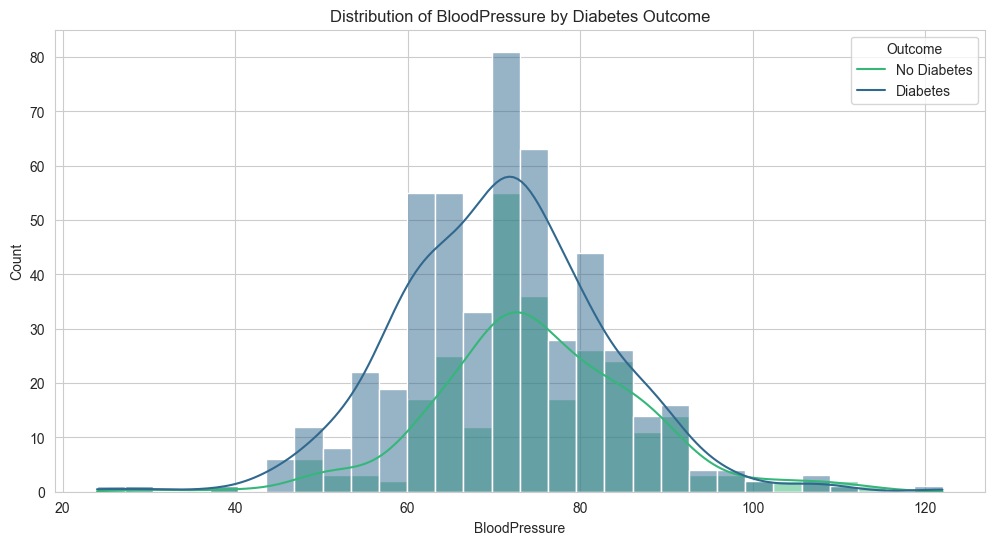

In [ ]:
def plot_distribution_by_outcome(data, feature, bins=30):
    """
    Plots the distribution of a numerical feature, separated by the 'Outcome' (diabetes).
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=feature, hue='Outcome', kde=True, bins=bins, palette='viridis')
    plt.title(f'Distribution of {feature} by Diabetes Outcome')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
    #plt.savefig(f'distribution_{feature}.png')
    plt.show()

plot_distribution_by_outcome(df, 'Glucose')
plot_distribution_by_outcome(df, 'BloodPressure')

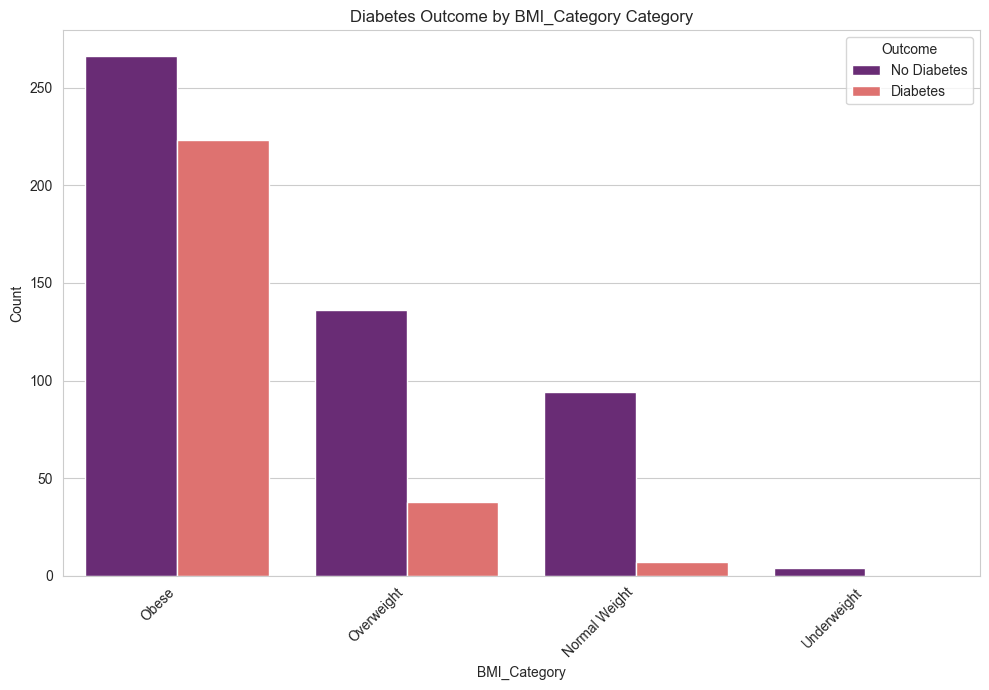

In [ ]:
def plot_categorical_distribution_by_outcome(data, feature):
    """
    Plots the distribution of a categorical feature, separated by the 'Outcome' (diabetes).
    Shows counts for each category and outcome.
    """
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x=feature, hue='Outcome', palette='magma', order=data[feature].value_counts().index)
    plt.title(f'Diabetes Outcome by {feature} Category')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
    plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    #plt.savefig(f'categorical_distribution_{feature}.png')
    plt.show()

plot_categorical_distribution_by_outcome(df, 'BMI_Category')